<a href="https://colab.research.google.com/github/MindEvo/Doggo-Moods/blob/main/SVM_DogEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####################
# IMPORT LIBRARIES #
####################
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

In [ ]:
#####################################
# Load label data from local drive  #
#####################################
local_path = "C:/Users/MindE/CSULA/CS4662/projects/Dog_Emotion/labels.csv"
labels = pd.read_csv(local_path)

# Sort the labels
sorted_labels = labels.sort_values(by="filename")

############
# CHECK IT #
############
sorted_labels.head(20)

In [ ]:
###########################################################
# Determine average dimensions of the images for resizing #
###########################################################
path = "YOUR FILEPATH HERE"

# widths = []
# heights = []

# for file in os.listdir(path):
#     img_path = os.path.join(path, file)
#     img = cv2.imread(img_path)
#     height, width, _ = img.shape

#     widths.append(width)
#     heights.append(height)

# avg_width = sum(widths) / len(widths)
# avg_height = sum(heights) / len(heights)

# print(f"Average width: {avg_width}")
# print(f"Average height: {avg_height}")

,Unnamed: 0,filename,label
543,543,001ndHD2FL3RHNrUp29Qp4WvTiHo5K388.jpg,sad
2695,2695,02moEqkRoDqAbzoLSBOuzFd3iVK53n423.jpg,relaxed
824,824,02rDGGot7kGU3cKIB5qhOfPaetpRNq548.jpg,sad
929,929,04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg,happy
607,607,04SQoOw0cFD5lsACrLRCmUWFPu16AU746.jpg,sad
382,382,04f9aAUe5glmLufixJGSc9Yv1X2mRU123.jpg,relaxed
1369,1369,05fRy39hx2kiC09SbErKww536WBPym179.jpg,happy
3855,3855,08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg,happy
2017,2017,09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg,angry
2399,2399,09qhORmLRHfy6HgNlXTDlqJVk1NJod130.jpg,sad


In [ ]:
##############
# Load image #
##############
images = []

#Need to ensure the images are sorted
sorted_files = sorted(os.listdir(path))

#Load the images into an array
for fil in sorted_files:
    img = mpimg.imread(os.path.join(path, fil))
    images.append(img)

In [ ]:
############################
# Resize images to 384x384 #
############################
desired_shape = (192, 192)
resized_images = []
for img in images:
    resized_img = cv2.resize(img, desired_shape, interpolation=cv2.INTER_AREA)
    resized_images.append(resized_img)

['001ndHD2FL3RHNrUp29Qp4WvTiHo5K388.jpg', '02moEqkRoDqAbzoLSBOuzFd3iVK53n423.jpg', '02rDGGot7kGU3cKIB5qhOfPaetpRNq548.jpg', '04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg', '04SQoOw0cFD5lsACrLRCmUWFPu16AU746.jpg', '04f9aAUe5glmLufixJGSc9Yv1X2mRU123.jpg', '05fRy39hx2kiC09SbErKww536WBPym179.jpg', '08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg', '09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg', '09qhORmLRHfy6HgNlXTDlqJVk1NJod130.jpg', '0A7QpoL9r4k80HkzQBLCi7biz0K7fo580.jpg', '0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg', '0BntC5Yeh254FCqZO9f7Rd88myxmm5172.jpg', '0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg', '0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg', '0CD90u75I6WgftgwIvq0pNM6rsHInC795.jpg', '0CKEasJsk8blkrGxnOw3IdKu6X3Pvq970.jpg', '0DZ2CGlS2MCjj93jPNlF6HcPqi1hMT621.jpg', '0EQMZWlWXsBzmEQfBwR3UdEQf3HVc2275.jpg', '0ETqMMxPKidOGu2sPtsziVYQzTA58F460.jpg']


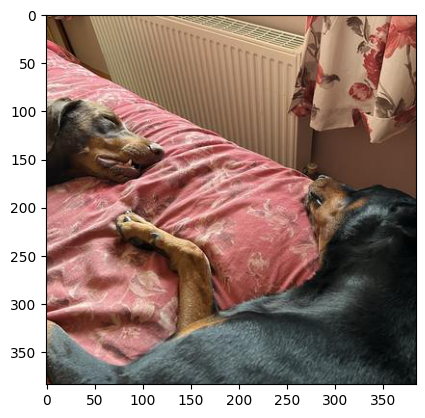

In [ ]:
############
# Check it #
############
#print(sorted_files[3950:3999])
plt.imshow(resized_images[3999], cmap=plt.cm.gray)

In [ ]:
label_encoder = LabelEncoder()
#############################################
# Build the feature matrix and label vector #
#############################################
X = np.array([img.flatten() for img in resized_images])
y = label_encoder.fit_transform(labels.iloc[:, -1])

#####################
# Check data frames #
#####################
print(f"X Shape:{X.shape}\ny Shape:{y.shape}")

X Shape:(4000, 442368)
y Shape:(4000,)


In [ ]:
##########################
# Normalize the features #
##########################
X_normal = scale(X)

In [ ]:
# Calculate the mean and standard deviation of the scaled features to verify normalization
mean = X_normal.mean(axis=0)
std_dev = X_normal.std(axis=0)

print("Mean of the scaled features:", mean)
print("Standard deviation of the scaled features:", std_dev)

In [ ]:
#################################################
# Split the data into training and testing sets #
#################################################
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.20, random_state=1)

In [ ]:
#####################################
# Get cumulative explained variance #
#####################################
n_components = 400
myPCA = PCA(n_components=n_components)
myPCA.fit(X_normal)

explained_variance_ratio = myPCA.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
#plt.xlim(0, 1000)
plt.ylim(0, 0.9)
plt.grid()
plt.show()

In [ ]:
####################################
# Run PCA to reduce dimensionality #
####################################
k = 200
myPCA = PCA(n_components=k)
X_train_new = myPCA.fit_transform(X_train)
X_test_new = myPCA.transform(X_test)

In [ ]:
#####################
# Check data frames #
#####################
print(f"X_train Shape:{X_train.shape}\nX_test Shape:{X_test.shape}")
print(f"X_train_new Shape:{X_train_new.shape}\nX_test_new Shape:{X_test_new.shape}")

In [ ]:
#############################
# Create the SVM Classifier #
#############################
mySVC = SVC(C=50000, kernel='sigmoid', gamma=0.01, random_state=1)
mySVC.fit(X_train_new, y_train)
y_pred = mySVC.predict(X_test_new)

In [ ]:
############################################
# Report the accuracy and confusion matrix #
############################################
accuracy = metrics.accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")

In [ ]:
#########################
# Create the classifier #
#########################
mySVC = SVC(kernel='sigmoid', random_state=1)

############################
# Setup the parameter grid #
############################
param_grid = {
    'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
}

##################################
# Run PCA on the normalized data #
##################################
X_Normalized_pca = myPCA.fit_transform(X_normal)

###################
# Run Grid Search #
###################
my_grid = GridSearchCV(mySVC, param_grid, scoring='accuracy', cv=10, verbose=3)
my_grid.fit(X_Normalized_pca, y)

In [ ]:
###############################################
# View the best value for C and best accuracy #
###############################################
print("Best value for parameters C, gamma:", my_grid.best_params_)
print("Best accuracy:", my_grid.best_score_)